# Trabajo Práctico 2 - Clasificación

## Tecnicatura Universitaria en Inteligencia Artificial - FCEIA

## Aprendizaje Automático 1

---

### Objetivo del Trabajo

Desarrollar un modelo de clasificación binaria para **predecir si lloverá al día siguiente** en diferentes ciudades de Australia, utilizando datos meteorológicos históricos. El modelo debe ser capaz de realizar predicciones a las 23:59:59hs de cada día.


### Herramientas y Tecnologías

- **scikit-learn**: Pre-procesamiento de datos, implementación de modelos de clasificación y evaluación de métricas
- **TensorFlow**: Entrenamiento de redes neuronales
- **Docker**: Puesta en producción del modelo seleccionado


### Dataset: Weather Australia

El dataset `weatherAUS.csv` contiene información climática de Australia de los últimos 10 años, con observaciones de múltiples ciudades (columna `Location`). La variable objetivo es `RainTomorrow`, que indica si al día siguiente llovió o no.

---

### Integrantes:

**Florencia Mezzano**, **Fabrizio Tapia**, **Sebastián Perez**

---


## 0. Carga de Datos

In [106]:
# Importación de librerías básicas para análisis de datos y visualización
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette('husl')
%matplotlib inline
warnings.filterwarnings('ignore')
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 100)

In [107]:
df = pd.read_csv('weatherAUS.csv')

print(f'Dimensiones: {df.shape[0]:,} x {df.shape[1]}')
print(f'Período de datos: {df["Date"].min()} a {df["Date"].max()}')
print(f'Número de ciudades: {df["Location"].nunique()}')

Dimensiones: 145,460 x 23
Período de datos: 2007-11-01 a 2017-06-25
Número de ciudades: 49


###  0.1 Exploración Inicial del Dataset

In [108]:
df.head(10)

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,WNW,20.0,24.0,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,WSW,4.0,22.0,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,WSW,19.0,26.0,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,E,11.0,9.0,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,NW,7.0,20.0,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No
5,2008-12-06,Albury,14.6,29.7,0.2,NaN,NaN,WNW,56.0,W,W,19.0,24.0,55.0,23.0,1009.2,1005.4,NaN,NaN,20.6,28.9,No,No
6,2008-12-07,Albury,14.3,25.0,0.0,NaN,NaN,W,50.0,SW,W,20.0,24.0,49.0,19.0,1009.6,1008.2,1.0,NaN,18.1,24.6,No,No
7,2008-12-08,Albury,7.7,26.7,0.0,NaN,NaN,W,35.0,SSE,W,6.0,17.0,48.0,19.0,1013.4,1010.1,NaN,NaN,16.3,25.5,No,No
8,2008-12-09,Albury,9.7,31.9,0.0,NaN,NaN,NNW,80.0,SE,NW,7.0,28.0,42.0,9.0,1008.9,1003.6,NaN,NaN,18.3,30.2,No,Yes
9,2008-12-10,Albury,13.1,30.1,1.4,NaN,NaN,W,28.0,S,SSE,15.0,11.0,58.0,27.0,1007.0,1005.7,NaN,NaN,20.1,28.2,Yes,No


In [109]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145460 entries, 0 to 145459
Data columns (total 23 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Date           145460 non-null  object 
 1   Location       145460 non-null  object 
 2   MinTemp        143975 non-null  float64
 3   MaxTemp        144199 non-null  float64
 4   Rainfall       142199 non-null  float64
 5   Evaporation    82670 non-null   float64
 6   Sunshine       75625 non-null   float64
 7   WindGustDir    135134 non-null  object 
 8   WindGustSpeed  135197 non-null  float64
 9   WindDir9am     134894 non-null  object 
 10  WindDir3pm     141232 non-null  object 
 11  WindSpeed9am   143693 non-null  float64
 12  WindSpeed3pm   142398 non-null  float64
 13  Humidity9am    142806 non-null  float64
 14  Humidity3pm    140953 non-null  float64
 15  Pressure9am    130395 non-null  float64
 16  Pressure3pm    130432 non-null  float64
 17  Cloud9am       89572 non-null

In [110]:
print("Columnas del dataset:\n")
for i, (col, dtype) in enumerate(zip(df.columns, df.dtypes), 1):
    print(f"{i:2d}. {col:20s} - {dtype}")

Columnas del dataset:

 1. Date                 - object
 2. Location             - object
 3. MinTemp              - float64
 4. MaxTemp              - float64
 5. Rainfall             - float64
 6. Evaporation          - float64
 7. Sunshine             - float64
 8. WindGustDir          - object
 9. WindGustSpeed        - float64
10. WindDir9am           - object
11. WindDir3pm           - object
12. WindSpeed9am         - float64
13. WindSpeed3pm         - float64
14. Humidity9am          - float64
15. Humidity3pm          - float64
16. Pressure9am          - float64
17. Pressure3pm          - float64
18. Cloud9am             - float64
19. Cloud3pm             - float64
20. Temp9am              - float64
21. Temp3pm              - float64
22. RainToday            - object
23. RainTomorrow         - object


In [111]:
df.describe().T
# La T es para que la tabla se muestre horizontal y se visualice mejor

,count,mean,std,min,25%,50%,75%,max
MinTemp,143975.0,12.194034,6.398495,-8.5,7.6,12.0,16.9,33.9
MaxTemp,144199.0,23.221348,7.119049,-4.8,17.9,22.6,28.2,48.1
Rainfall,142199.0,2.360918,8.478060,0.0,0.0,0.0,0.8,371.0
Evaporation,82670.0,5.468232,4.193704,0.0,2.6,4.8,7.4,145.0
Sunshine,75625.0,7.611178,3.785483,0.0,4.8,8.4,10.6,14.5
WindGustSpeed,135197.0,40.035230,13.607062,6.0,31.0,39.0,48.0,135.0
WindSpeed9am,143693.0,14.043426,8.915375,0.0,7.0,13.0,19.0,130.0
WindSpeed3pm,142398.0,18.662657,8.809800,0.0,13.0,19.0,24.0,87.0
Humidity9am,142806.0,68.880831,19.029164,0.0,57.0,70.0,83.0,100.0
Humidity3pm,140953.0,51.539116,20.795902,0.0,37.0,52.0,66.0,100.0


## 1. CLUSTERING

In [112]:
print(f'Cantidad de ciudades en el dataset: {df["Location"].value_counts().count()}')
print(f'Cantidad de valores nulos: {df["Location"].isna().sum()}')
print('----------Ciudades----------')
print(df["Location"].value_counts().sort_index())

Cantidad de ciudades en el dataset: 49
Cantidad de valores nulos: 0
----------Ciudades----------
Location
Adelaide            3193
Albany              3040
Albury              3040
AliceSprings        3040
BadgerysCreek       3009
Ballarat            3040
Bendigo             3040
Brisbane            3193
Cairns              3040
Canberra            3436
Cobar               3009
CoffsHarbour        3009
Dartmoor            3009
Darwin              3193
GoldCoast           3040
Hobart              3193
Katherine           1578
Launceston          3040
Melbourne           3193
MelbourneAirport    3009
Mildura             3009
Moree               3009
MountGambier        3040
MountGinini         3040
Newcastle           3039
Nhil                1578
NorahHead           3004
NorfolkIsland       3009
Nuriootpa           3009
PearceRAAF          3009
Penrith             3039
Perth               3193
PerthAirport        3009
Portland            3009
Richmond            3009
Sale               

### 1.1 OPCIONES DE CLUSTERING (ELEGIR UNO)

#### kmeans de scikit-learn

Tambien hay otras opciones de modelos de scikit-learn para usar

https://scikit-learn.org/stable/modules/clustering.html

##### Diccionario coordenadas de ciudades

In [113]:
city_coords = {
    # --- New South Wales (NSW) ---
    'Albury': (-36.0737, 146.9135),
    'BadgerysCreek': (-33.8820, 150.7170),
    'Cobar': (-31.4980, 145.8380),
    'CoffsHarbour': (-30.2963, 153.1157),
    'Moree': (-29.4657, 149.8410),
    'Newcastle': (-32.9283, 151.7817),
    'NorahHead': (-33.2820, 151.5770),
    'NorfolkIsland': (-29.0330, 167.9500),
    'Penrith': (-33.7510, 150.6940),
    'Richmond': (-33.6000, 150.7800),
    'Sydney': (-33.8688, 151.2093),
    'SydneyAirport': (-33.9461, 151.1772),
    'WaggaWagga': (-35.1189, 147.3697),
    'Williamtown': (-32.7950, 151.8350),
    'Wollongong': (-34.4278, 150.8931),

    # --- Australian Capital Territory (ACT) ---
    'Canberra': (-35.2809, 149.1300),
    'Tuggeranong': (-35.4240, 149.0910),
    'MountGinini': (-35.5290, 148.7720),

    # --- Victoria (VIC) ---
    'Ballarat': (-37.5622, 143.8503),
    'Bendigo': (-36.7570, 144.2794),
    'Sale': (-38.1106, 147.0684),
    'MelbourneAirport': (-37.6690, 144.8410),
    'Melbourne': (-37.8136, 144.9631),
    'Mildura': (-34.1850, 142.1620),
    'Nhil': (-36.3333, 141.6500),
    'Portland': (-38.3420, 141.6050),
    'Watsonia': (-37.7167, 145.0833),
    'Dartmoor': (-37.9200, 141.2830),

    # --- Queensland (QLD) ---
    'Brisbane': (-27.4698, 153.0251),
    'Cairns': (-16.9203, 145.7700),
    'GoldCoast': (-28.0167, 153.4000),
    'Townsville': (-19.2590, 146.8169),

    # --- South Australia (SA) ---
    'Adelaide': (-34.9285, 138.6007),
    'MountGambier': (-37.8310, 140.7790),
    'Nuriootpa': (-34.4680, 138.9970),
    'Woomera': (-31.2000, 136.8167),

    # --- Western Australia (WA) ---
    'Albany': (-35.0228, 117.8814),
    'Witchcliffe': (-34.0100, 115.1000),
    'PearceRAAF': (-31.6670, 116.0170),
    'PerthAirport': (-31.9403, 115.9672),
    'Perth': (-31.9523, 115.8613),
    'SalmonGums': (-33.0860, 121.6370),
    'Walpole': (-34.9730, 116.7340),

    # --- Tasmania (TAS) ---
    'Hobart': (-42.8821, 147.3272),
    'Launceston': (-41.4332, 147.1441),

    # --- Northern Territory (NT) ---
    'AliceSprings': (-23.6980, 133.8807),
    'Darwin': (-12.4634, 130.8456),
    'Katherine': (-14.4650, 132.2630),
    'Uluru': (-25.3444, 131.0369)
}

##### Implementacion

In [114]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

In [115]:
cities = sorted(df['Location'].unique())

loc_df = (pd.DataFrame({'Location': cities})
          .assign(lat=lambda d: d['Location'].map(lambda x: city_coords.get(x, (np.nan, np.nan))[0]),
                  lon=lambda d: d['Location'].map(lambda x: city_coords.get(x, (np.nan, np.nan))[1])))
assert loc_df['lat'].notna().all() and loc_df['lon'].notna().all(), "Faltan coordenadas para alguna Location."
loc_df.head()

,Location,lat,lon
0,Adelaide,-34.9285,138.6007
1,Albany,-35.0228,117.8814
2,Albury,-36.0737,146.9135
3,AliceSprings,-23.6980,133.8807
4,BadgerysCreek,-33.8820,150.7170


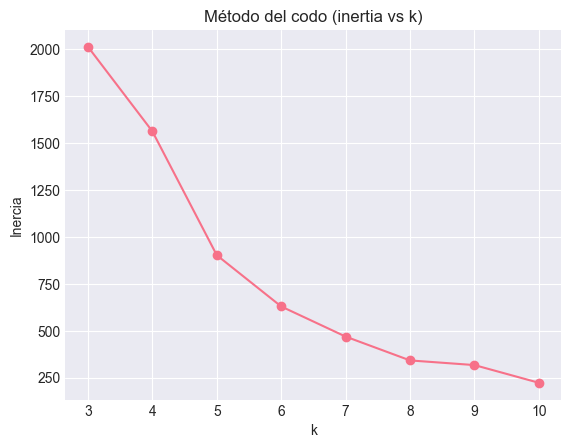

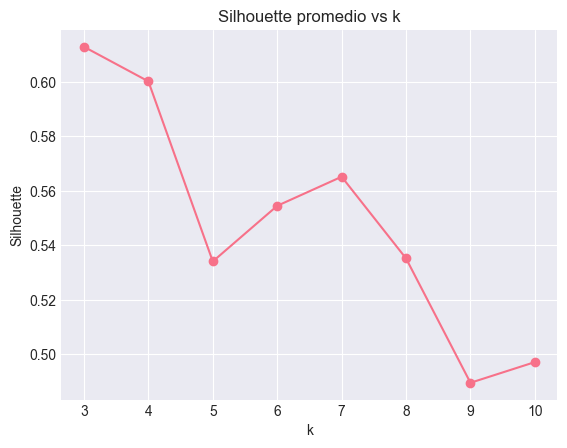

In [116]:
X_loc = loc_df[['lat', 'lon']].to_numpy()
inertias, silhouettes, ks = [], [], range(3, 11)

for k in ks:
    km = KMeans(n_clusters=k, random_state=42, n_init='auto').fit(X_loc)
    inertias.append(km.inertia_)
    labels = km.labels_
    silhouettes.append(silhouette_score(X_loc, labels))

fig, ax = plt.subplots()
ax.plot(list(ks), inertias, marker='o')
ax.set_title('Método del codo (inertia vs k)')
ax.set_xlabel('k'); ax.set_ylabel('Inercia'); plt.show()

fig, ax = plt.subplots()
ax.plot(list(ks), silhouettes, marker='o')
ax.set_title('Silhouette promedio vs k')
ax.set_xlabel('k'); ax.set_ylabel('Silhouette'); plt.show()

In [117]:
#le pase los graficos al chat y me recomendo usar k=6, se podria probar con 4 o con 8 para ver diferencias
k_opt = 8  # ← ajustá según tus gráficos y comenta por qué

kmeans = KMeans(n_clusters=k_opt, random_state=42, n_init='auto').fit(X_loc)
loc_df['Region'] = kmeans.labels_

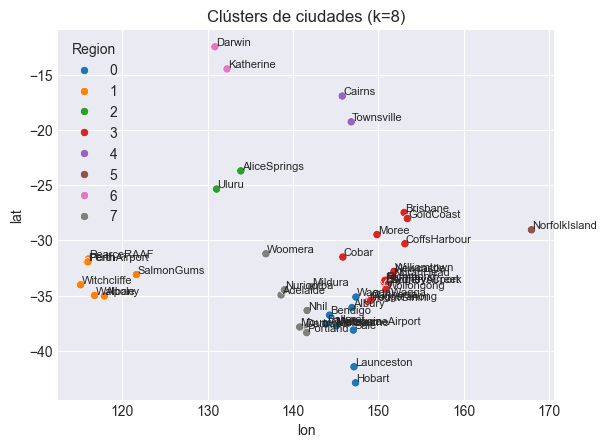

In [118]:
plt.figure()
sns.scatterplot(data=loc_df, x='lon', y='lat', hue='Region', palette='tab10')
for _, r in loc_df.iterrows():
    plt.text(r['lon']+0.1, r['lat']+0.1, r['Location'], fontsize=8)
plt.title(f'Clústers de ciudades (k={k_opt})')
plt.show()

In [119]:
df = df.merge(loc_df[['Location','Region']], on='Location', how='left')
df['Region'] = df['Region'].astype('category')

#### Regiones de australia

9 clusters: 6 estados y 2 territorios nacionales (queda fuera la isla Norfolk, no pertenece a ningun estado)
https://www.educaraustralia.com/Vivir-en-Australia/Regiones-de-Australia

In [ ]:
city_to_state = {
    'Adelaide':'SA', 'Albany':'WA', 'Albury':'NSW', 'AliceSprings':'NT',
    'BadgerysCreek':'NSW', 'Ballarat':'VIC', 'Bendigo':'VIC', 'Brisbane':'QLD',
    'Cairns':'QLD', 'Canberra':'ACT', 'Cobar':'NSW', 'CoffsHarbour':'NSW',
    'Dartmoor':'VIC', 'Darwin':'NT', 'GoldCoast':'QLD', 'Hobart':'TAS',
    'Katherine':'NT', 'Launceston':'TAS', 'Melbourne':'VIC', 'MelbourneAirport':'VIC',
    'Mildura':'VIC', 'Moree':'NSW', 'MountGambier':'SA', 'MountGinini':'ACT',
    'Newcastle':'NSW', 'Nhil':'VIC', 'NorahHead':'NSW', 'NorfolkIsland':'External Territory',
    'Nuriootpa':'SA', 'PearceRAAF':'WA', 'Penrith':'NSW', 'Perth':'WA',
    'PerthAirport':'WA', 'Portland':'VIC', 'Richmond':'NSW', 'Sale':'VIC',
    'SalmonGums':'WA', 'Sydney':'NSW', 'SydneyAirport':'NSW', 'Townsville':'QLD',
    'Tuggeranong':'ACT', 'Uluru':'NT', 'WaggaWagga':'NSW', 'Walpole':'WA',
    'Watsonia':'VIC', 'Williamtown':'NSW', 'Witchcliffe':'WA', 'Wollongong':'NSW',
    'Woomera':'SA'
}

state_full = {
    'NSW':'New South Wales', 'VIC':'Victoria', 'QLD':'Queensland',
    'SA':'South Australia', 'WA':'Western Australia', 'TAS':'Tasmania',
    'NT':'Northern Territory', 'ACT':'Australian Capital Territory',
    'External Territory':'External Territory'
}

df['State'] = df['Location'].map(city_to_state)
df['StateName'] = df['State'].map(state_full)

Region
3    52277
0    30582
7    22856
1    21267
4     6080
6     4771
2     4618
5     3009
Name: count, dtype: int64
State
NSW                   42578
VIC                   28905
WA                    21267
QLD                   12313
SA                    12251
ACT                    9515
NT                     9389
TAS                    6233
External Territory     3009
Name: count, dtype: int64


#### NRM Regions - APORTE DE MARTIN

Clusters por regiones segun condiciones climaticas y de recursos naturales hecho por una pagina oficial del gobierno de Australia
https://www.climatechangeinaustralia.gov.au/en/overview/methodology/nrm-regions/

Australia se divide oficialmente en 56 Natural Resource Management Regions, agrupadas por el gobierno en seis grandes NRM Clusters según sus condiciones climáticas, ecológicas y geográficas.
Estas regiones —Northern Australia, Wet Tropics, Rangelands, Southern Slopes, South-Eastern Australia y South-West WA— son equivalentes a las regiones ambientales argentinas (NOA, NEA, Cuyo, Pampeana, Patagonia, etc.), por lo que se utilizan como referencia para validar o justificar la agrupación de ciudades realizada.

SI SE USA ESTA OPCION AGREGAR A LA CARPETA ESTE ARCHIVO: F:/Facultad/TUIA/Aprendizaje Automatico 1/NRM_clusters/NRM_clusters.shp con los poligonos

In [137]:
import geopandas as gpd

# Leer el shapefile completo
nrm = gpd.read_file("F:/Facultad/TUIA/Aprendizaje Automatico 1/NRM_clusters/NRM_clusters.shp")

nrm = nrm.to_crs(epsg=4326)
print(nrm.crs)  # debe decir EPSG:4326

EPSG:4326


In [142]:
# --- 2. Crear GeoDataFrame con tus ciudades y coordenadas del diccionario ---
ciudades = pd.DataFrame({
    'Location': sorted(df['Location'].unique())
})
ciudades['Latitude']  = ciudades['Location'].map(lambda c: city_coords[c][0])
ciudades['Longitude'] = ciudades['Location'].map(lambda c: city_coords[c][1])

ciudades_gdf = gpd.GeoDataFrame(
    ciudades,
    geometry=gpd.points_from_xy(ciudades['Longitude'], ciudades['Latitude']),
    crs="EPSG:4326"
)

# --- 3. Unión espacial (cada ciudad con su polígono NRM) ---
joined = gpd.sjoin(ciudades_gdf, nrm[['code','label','geometry']], how="left", predicate="within")

# --- 4. Renombrar y quedarte con columnas útiles ---
joined = joined.rename(columns={'code': 'NRM_code', 'label': 'NRM_label'})
ciudades_cluster = joined[['Location', 'NRM_code', 'NRM_label']]

# --- 5. Agregar los clusters al df principal ---
df = df.merge(ciudades_cluster, on='Location', how='left')

# --- 6. Verificación rápida ---
#print('✅ Clusters agregados al df')
#print(df[['Location', 'NRM_label']].drop_duplicates().sort_values('Location').to_string(index=False))

# (opcional) Ver cantidad de ciudades por cluster
print('\nDistribución por cluster:')
print(df["NRM_label"].value_counts().sum())


Distribución por cluster:
142451


#### comparacion entre los 3 clusterings

In [133]:
print(df['Region'].value_counts())
print('----------------------------')
print(df['State'].value_counts())

Region
3    52277
0    30582
7    22856
1    21267
4     6080
6     4771
2     4618
5     3009
Name: count, dtype: int64
----------------------------
State
NSW                   42578
VIC                   28905
WA                    21267
QLD                   12313
SA                    12251
ACT                    9515
NT                     9389
TAS                    6233
External Territory     3009
Name: count, dtype: int64


## 2. EDA 

### 2.1 Análisis de Valores Faltantes

Los valores faltantes son un aspecto crítico que debe ser abordado antes del modelado. Es importante identificar qué variables tienen datos faltantes y en qué proporción.

In [121]:
missing_values = df.isnull().sum()
missing_percent = (missing_values / len(df)) * 100

missing_df = pd.DataFrame({
    'Valores Faltantes': missing_values,
    'Porcentaje': missing_percent
})

# Esto solo ordena las columnas con valores faltantes por porcentaje
missing_df = missing_df[missing_df['Valores Faltantes'] > 0].sort_values(
    by='Porcentaje', ascending=False
)

print("ANÁLISIS DE VALORES FALTANTES:")

print(f"\nTotal de columnas con valores faltantes: {len(missing_df)}\n")
missing_df

ANÁLISIS DE VALORES FALTANTES:

Total de columnas con valores faltantes: 21



,Valores Faltantes,Porcentaje
Sunshine,69835,48.009762
Evaporation,62790,43.166506
Cloud3pm,59358,40.807095
Cloud9am,55888,38.421559
Pressure9am,15065,10.356799
Pressure3pm,15028,10.331363
WindDir9am,10566,7.263853
WindGustDir,10326,7.098859
WindGustSpeed,10263,7.055548
Humidity3pm,4507,3.098446


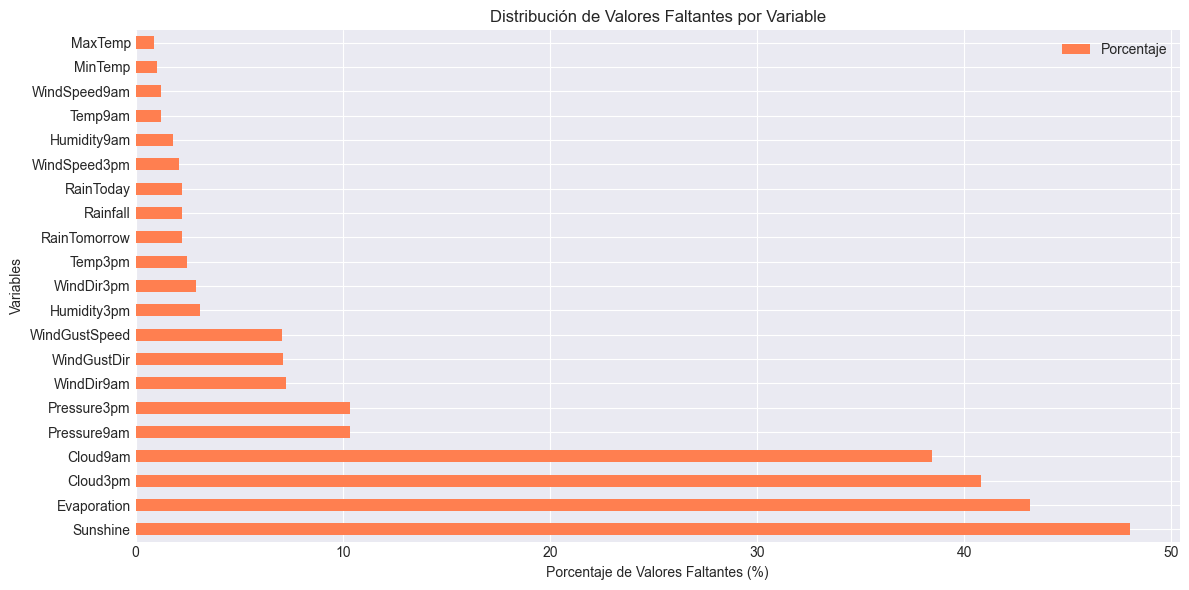

In [122]:
plt.figure(figsize=(12, 6))
missing_df['Porcentaje'].plot(kind='barh', color='coral')
plt.xlabel('Porcentaje de Valores Faltantes (%)')
plt.ylabel('Variables')
plt.title('Distribución de Valores Faltantes por Variable')
plt.legend()
plt.tight_layout()
plt.show()

### 2.2 Análisis de la Variable Objetivo

La variable objetivo `RainTomorrow` es binaria (Yes/No). Es fundamental analizar su distribución para detectar posibles desbalances de clases, lo cual afectará la elección de métricas y técnicas de modelado.

In [123]:
# Análisis de la distribución de la variable objetivo

print("DISTRIBUCIÓN DE LA VARIABLE OBJETIVO: RainTomorrow \n")

print("Conteo:")
print(df['RainTomorrow'].value_counts())

print("\nPorcentaje:")
print(df['RainTomorrow'].value_counts(normalize=True) * 100) 

print(f"\nValores nulos en RainTomorrow: {df['RainTomorrow'].isnull().sum()}")

DISTRIBUCIÓN DE LA VARIABLE OBJETIVO: RainTomorrow 

Conteo:
RainTomorrow
No     110316
Yes     31877
Name: count, dtype: int64

Porcentaje:
RainTomorrow
No     77.581878
Yes    22.418122
Name: proportion, dtype: float64

Valores nulos en RainTomorrow: 3267


VAMOS A TENER QUE HACER ALGUN BALANCEO DE CLASES


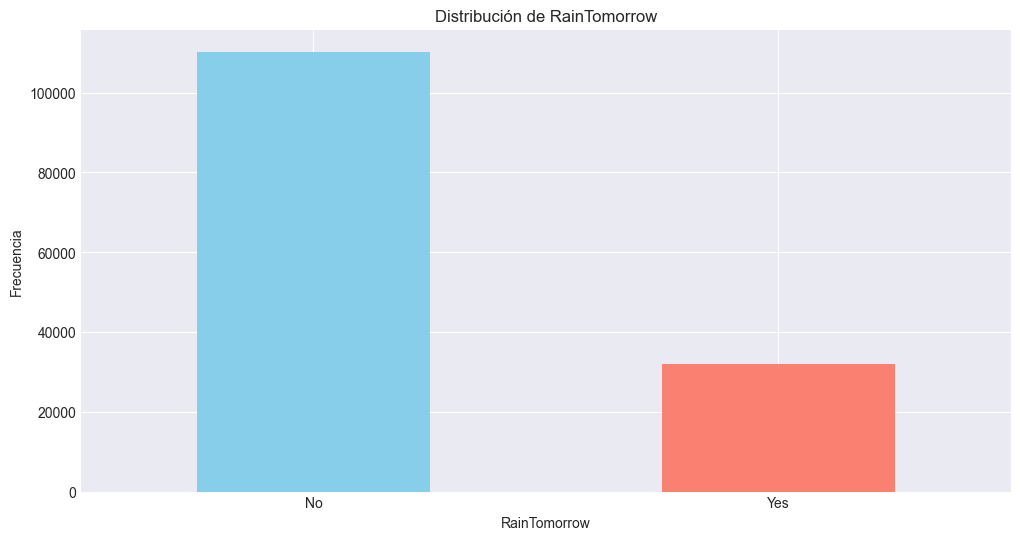

In [124]:
# Visualización de la distribución de la variable objetivo
#Grafico de barras
plt.figure(figsize=(12, 6))
df['RainTomorrow'].value_counts().plot(kind='bar', color=['skyblue', 'salmon'], rot=0)
plt.title('Distribución de RainTomorrow')
plt.xlabel('RainTomorrow')
plt.ylabel('Frecuencia')
plt.show()


### 2.3 Análisis de Ciudades (Location)

El dataset contiene observaciones de múltiples ciudades. Es importante entender la distribución geográfica de los datos.

In [125]:
# Análisis de la distribución de observaciones por ciudad
print(f"Número total de ciudades: {df['Location'].nunique()}\n")
print("Top 10 ciudades con más observaciones:")
print(df['Location'].value_counts().head(10))

Número total de ciudades: 49

Top 10 ciudades con más observaciones:
Location
Canberra        3436
Sydney          3344
Darwin          3193
Melbourne       3193
Brisbane        3193
Adelaide        3193
Perth           3193
Hobart          3193
Albany          3040
MountGambier    3040
Name: count, dtype: int64


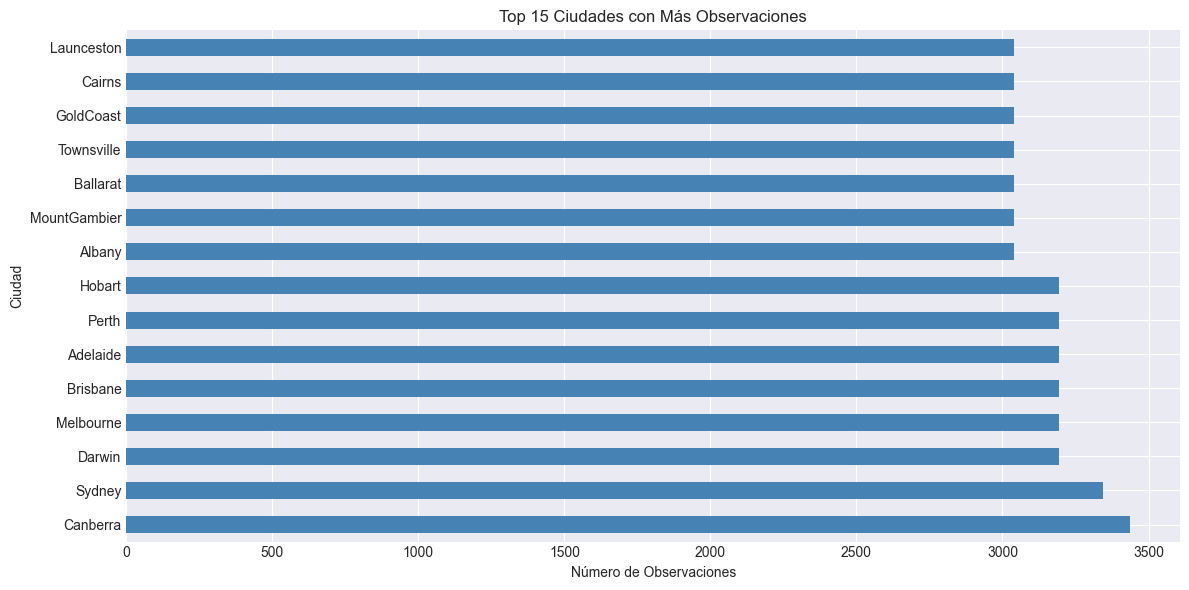

In [126]:
# Visualización de las ciudades con más observaciones
plt.figure(figsize=(12, 6))
df['Location'].value_counts().head(15).plot(kind='barh', color='steelblue')
plt.xlabel('Número de Observaciones')
plt.ylabel('Ciudad')
plt.title('Top 15 Ciudades con Más Observaciones')
plt.tight_layout()
plt.show()